# Описание проекта

Вас пригласили на стажировку в отдел маркетинговой аналитики Яндекс.Афиши. Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.
Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
лог сервера с данными о посещениях сайта Яндекс.Афиши,
выгрузка всех заказов за этот период,
статистика рекламных расходов.
Вам предстоит изучить:
как клиенты пользуются сервисом,
когда делают первые покупки на сайте,
сколько денег приносит компании каждый клиент,
когда расходы на привлечение клиента окупаются.
Выручка измеряется в условных единицах — у.е.

# 1.1. Положите данные о визитах, заказах и рекламных расходах в переменные;

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
visits = pd.read_csv('visits.zip', index_col=0)
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
visits.columns = ['device', 'session_end_ts', 'source_id', 'session_start_ts', 'uid']
visits['session_end_ts'] =  pd.to_datetime(visits['session_end_ts'], infer_datetime_format=True)
visits['session_start_ts'] =  pd.to_datetime(visits['session_start_ts'], infer_datetime_format=True)
visits.head()

,device,session_end_ts,source_id,session_start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   device            359400 non-null  object        
 1   session_end_ts    359400 non-null  datetime64[ns]
 2   source_id         359400 non-null  int64         
 3   session_start_ts  359400 non-null  datetime64[ns]
 4   uid               359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 16.5+ MB


В таблице visits находится 5 столбцов с количеством наблюдений - 359400. В данной таблице собраны данные по категории девайсов, даты начала и окончания сессии, идентификатор источника перехода на сайт и уникальный номер пользователя. 
В таблице visits поменяли названия столбцов на 'device', 'session_end_ts', 'source_id', 'session_start_ts', 'uid' для более удобного последующего анализа и расчетов по столбцам, а также привели значения дат в столбцах 'session_end_ts' и 'session_start_ts' к типу datetime. 

In [5]:
orders = pd.read_csv('orders.csv', index_col=0)
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
orders.columns = ['buy_ts', 'revenue', 'uid']
orders['buy_ts'] =  pd.to_datetime(orders['buy_ts'], infer_datetime_format=True)
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.5 MB


В таблице orders собраны данные по столбцам - уникальный номер пользователя, дата и время заказа, а также сумма заказа. Всего 50415 наблюдений. 
В таблице orders поменяли названия столбцов на 'buy_ts', 'revenue', 'uid' для более удобного последующего анализа и расчетов по столбцам, а также привели значения дат в столбце 'buy_ts' к типу datetime. 

In [8]:
costs = pd.read_csv('costs.csv', index_col=0)
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [9]:
costs.columns = ['source_id', 'date', 'costs']
orders['buy_ts'] =  pd.to_datetime(orders['buy_ts'], infer_datetime_format=True)
costs.head()

,source_id,date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   date       2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 79.4+ KB


В таблице costs собраны данные по столбцам - идентификатор рекламного источника, дата проведения компании и расходы на рекламную компанию. Всего 2542 наблюдения. 
В таблице costs поменяли названия столбцов на 'source_id', 'date', 'costs' для более удобного последующего анализа и расчетов по столбцам, а также привели значения дат в столбце 'buy_ts' к типу datetime. 

In [11]:
visits['session_year']  = visits['session_start_ts'].dt.year
visits['session_month'] = visits['session_start_ts'].dt.month
visits['session_week']  = visits['session_start_ts'].dt.week
visits['session_date'] = visits['session_start_ts'].dt.date
visits.head() 

C:\Users\chern\AppData\Local\Temp\ipykernel_14180\2489940164.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  visits['session_week']  = visits['session_start_ts'].dt.week


,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [12]:
print('Количество дубликтов для таблицы visits: {}'.format(visits.duplicated().sum()))
print('Количество дубликтов для таблицы orders: {}'.format(orders.duplicated().sum()))
print('Количество дубликтов для таблицы costs: {}'.format(costs.duplicated().sum()))

Количество дубликтов для таблицы visits: 0
Количество дубликтов для таблицы orders: 0
Количество дубликтов для таблицы costs: 0


# Шаг 2. Рассчитайте метрики и постройте графики

# 2.1.1. Рассчитайте DAU, WAU и MAU. Вычислите средние значения этих метрик за весь период. Отобразите изменения метрик во времени на графиках;

In [13]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = (
    visits.groupby(['session_year', 'session_week'])
    .agg({'uid': 'nunique'})
    .mean()
)
mau_total = (
    visits.groupby(['session_year', 'session_month'])
    .agg({'uid': 'nunique'})
    .mean()
)

print('Количество уникальных пользователей в день: {}'.format(int(dau_total)))
print('Количество уникальных пользователей в неделю: {}'.format(int(wau_total)))
print('Количество уникальных пользователей в месяц: {}'.format(int(mau_total)))

Количество уникальных пользователей в день: 907
Количество уникальных пользователей в неделю: 5716
Количество уникальных пользователей в месяц: 23228


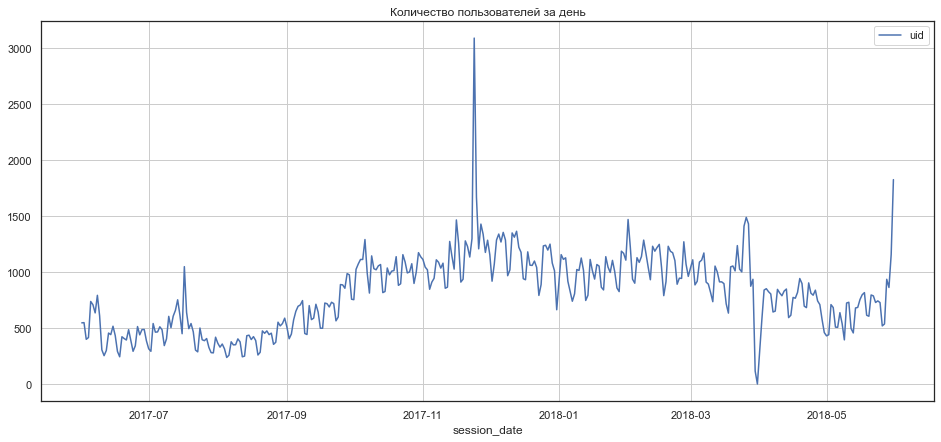

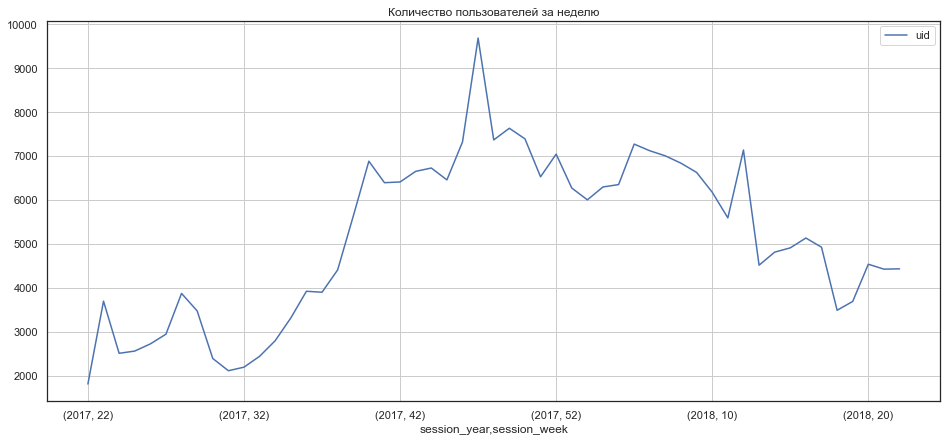

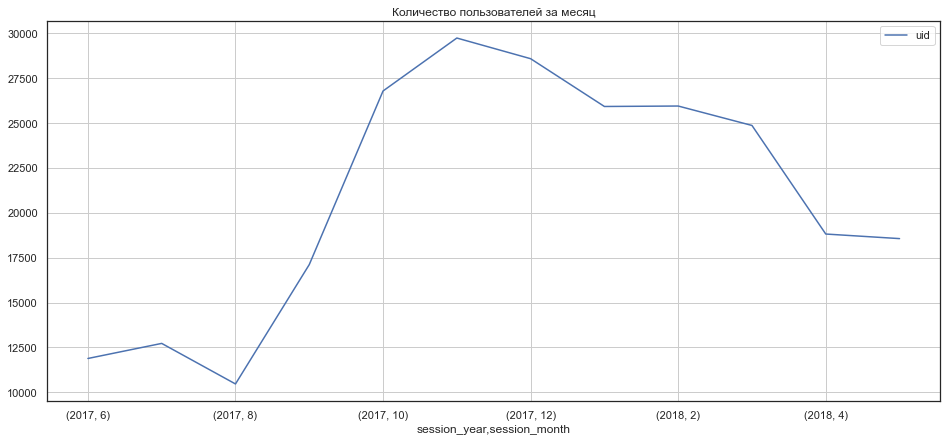

In [77]:
dau_graph = visits.groupby('session_date').agg({'uid': 'nunique'})
dau_graph.plot(y='uid', 
               style='-',
               title = 'Количество пользователей за день',
               figsize=(16,7), 
               grid=True)
wau_graph = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})
wau_graph.plot(y='uid', 
               style='-',
               title = 'Количество пользователей за неделю',
               figsize=(16,7), 
               grid=True)
mau_graph = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})
mau_graph.plot(y='uid',
               title = 'Количество пользователей за месяц',
               style='-',
               figsize=(16,7), 
               grid=True)
plt.show()

На графиках видно, что есть сильно выделяющиеся значения в конце Ноября 2017 года, где количество дневных пользователей в конце месяца превышает 3000 человек/день. В то время как в конце марта количество пользователей резко снизилось до 0 пользователей в день. 
В целом график "Количество пользователей за месяц" увеличивается с августа 2017 года до ноября 2017 года, после чего идет постепенное снижение количества пользователей. 

# 2.1.2. Определите, сколько раз за день пользователи в среднем заходят на сайт. Постройте график, отражающий изменения метрики во времени;

In [15]:
session_per_user = visits.groupby(['session_date', 'uid']).agg({'uid': 'count'})
mean_session_per_user = session_per_user.groupby('session_date').agg({'uid':'mean'}).reset_index()
mean_session_per_user.columns = ['session_date', 'mean_session']
mean_session_per_user.head(15)

,session_date,mean_session
0,2017-06-01,1.097521
1,2017-06-02,1.082237
2,2017-06-03,1.071910
3,2017-06-04,1.071429
4,2017-06-05,1.089024
5,2017-06-06,1.097867
6,2017-06-07,1.127325
7,2017-06-08,1.081797
8,2017-06-09,1.086331
9,2017-06-10,1.071429


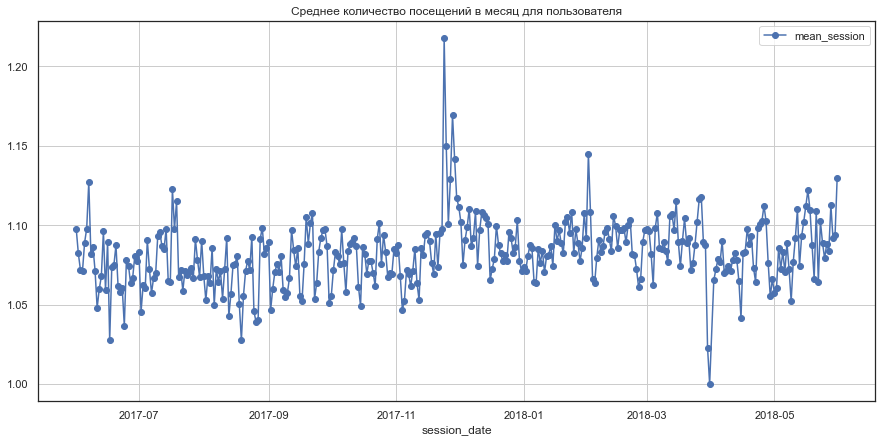

In [78]:
mean_session_per_user.plot(y='mean_session',
                           x='session_date',
                           title='Среднее количество посещений в месяц для пользователя',
                           style='o-',
                           grid=True,
                           figsize=(15,7))
plt.show()

График "Среднего количество посещений в месяц для пользователя" схож с графиком количества пользователей за день. Идентичные пики наблюдаются в конце ноября, а также резкое падение показателей в конце марта. 

In [17]:
print('В среднем в день пользователи заходят на сайт: {:.2f}'.format(mean_session_per_user['mean_session'].mean()))

В среднем в день пользователи заходят на сайт: 1.08


# 2.1.3. Исследуйте, сколько времени пользователи проводят на сайте.

In [18]:
visits['time_spent'] = visits['session_end_ts'] - visits['session_start_ts']
visits['time_spent'] = visits['time_spent'] / np.timedelta64(1, 'm')

In [19]:
visits_under = visits.query('time_spent < 0')
visits_over = visits.query('time_spent > 0')
print('Доля значений, в которых проведенное время меньше нуля: {:.7%}'.format(visits_under.shape[0] / visits_over.shape[0]))
visits = visits_over

Доля значений, в которых проведенное время меньше нуля: 0.0006180%


In [20]:
time_spent = visits.groupby('time_spent').agg({'uid': 'nunique'}).reset_index()
time_spent.columns = ['time_spent', 'uid']

In [21]:
time_spent.head(15)

,time_spent,uid
0,0.316667,868
1,1.000000,47514
2,2.000000,32583
3,3.000000,24618
4,4.000000,19611
5,5.000000,15887
6,6.000000,13417
7,7.000000,11518
8,8.000000,10265
9,9.000000,9094


Продолжительность типичной пользовательской сессии за весь период: 9.0


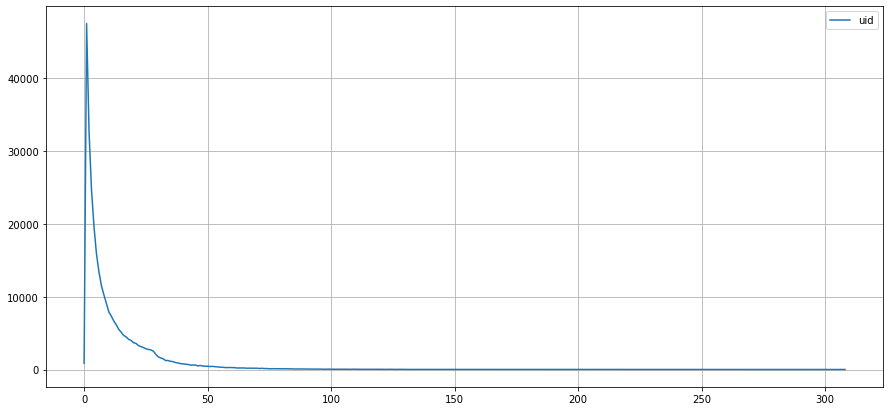

In [22]:
time_spent.plot(y='uid', 
               style='-', 
               figsize=(15,7), 
               grid=True)
print('Продолжительность типичной пользовательской сессии за весь период: {}'.format(time_spent['uid'].median()))

Средняя продолжительность типичной пользовательской сессии 9 минут. На графике это наблюдается в том, что большинство (более 40000) значений находится в промежутке от 0 до 10 минут. Этот показатель скорее является логически обоснованным, так как за это время пользователь теоретически может зайти на сайт, а также совершить первые покупки на сайте Яндекс.Афиши.

# 2.1.4. Рассчитайте Retention Rate, применяя когортный анализ. Покажите изменения метрики во времени на графике. Найдите средний Retention Rate на второй месяц «жизни» когорт.

In [23]:
first_visit_month = visits.groupby(['uid'])['session_date'].min().reset_index()
first_visit_month.columns = ['uid', 'first_visit_month']
visits_activity = visits.merge(first_visit_month, on='uid')

In [24]:
visits_activity['activity_month'] = visits_activity['session_date'].astype('datetime64[M]')
visits_activity['first_activity_month'] = visits_activity['first_visit_month'].astype('datetime64[M]')

In [25]:
visits_activity['cohort_lifetime'] = visits_activity['activity_month'] - visits_activity['first_activity_month']
visits_activity['cohort_lifetime'] = visits_activity['cohort_lifetime'] / np.timedelta64(1, 'M')
visits_activity['cohort_lifetime'] = visits_activity['cohort_lifetime'].round().astype('int')

In [26]:
cohorts = visits_activity.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [27]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})

In [28]:
cohorts = cohorts.merge(initial_users_count, on='first_activity_month')
cohorts

,first_activity_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,11885,11885
1,2017-06-01,1,900,11885
2,2017-06-01,2,606,11885
3,2017-06-01,3,710,11885
4,2017-06-01,4,777,11885
...,...,...,...,...
73,2018-03-01,1,766,18793
74,2018-03-01,2,480,18793
75,2018-04-01,0,14215,14215
76,2018-04-01,1,675,14215


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.075726,0.050989,0.059739,0.065377,0.067480,0.057720,0.056121,0.050989,0.049727,0.038115,0.043921
2017-07-01,1.0,0.054545,0.050402,0.055645,0.056660,0.046512,0.044059,0.044059,0.037886,0.027315,0.027061,NaN
2017-08-01,1.0,0.074452,0.060451,0.060451,0.047970,0.041459,0.036249,0.037660,0.027133,0.024745,NaN,NaN
2017-09-01,1.0,0.083570,0.067769,0.049322,0.038083,0.036959,0.035372,0.022876,0.022744,NaN,NaN,NaN
2017-10-01,1.0,0.078129,0.050811,0.037811,0.033648,0.031184,0.020775,0.019798,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078183,0.042733,0.037824,0.032593,0.021729,0.020602,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.054668,0.036518,0.030178,0.019453,0.017716,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.057794,0.037817,0.024352,0.019249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.056561,0.024290,0.019184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


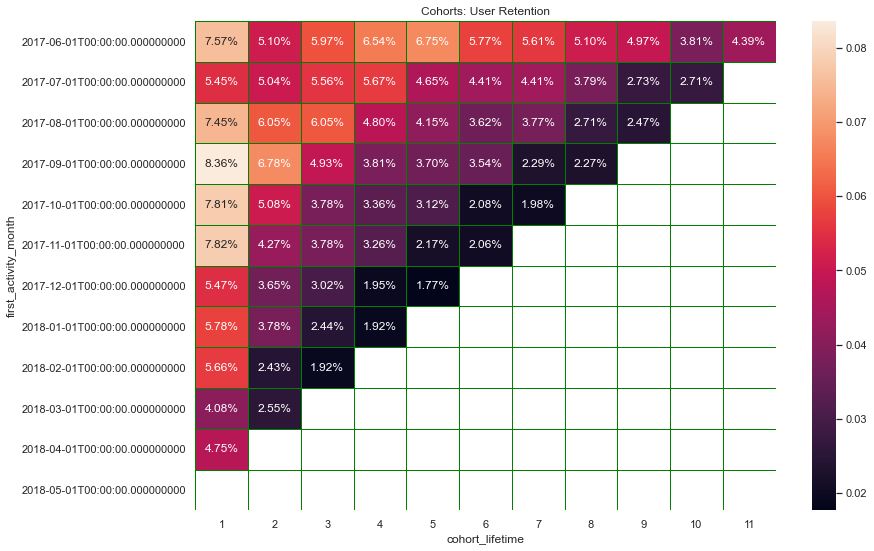

In [29]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(
        index='first_activity_month',
        columns='cohort_lifetime',
        values='retention',
        aggfunc='sum',
        )
display(retention_pivot)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot.drop([0], axis=1), annot=True, fmt='.2%', linewidths=1, linecolor='green');

Показатель Retention Rate демонстрирует, что в каждой кагорте с каждым новым месяцем людей оставалось меньше и меньше (менее 7% изначальных пользователей возвращалось в сервис). Данным показатель субъективен и для каждого сервиса расчитывается отдельно. Можно преположить, что 7% и в целом тренд на понижение количества пользователей сервиса Яндекс.Афиша это нормальный показатель, так как данный сервис специфический и редко люди пользуются и соответственно покупают билеты на мериприятия. 

# 2.2.1. Исследуйте, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки.

In [30]:
orders['buy_ts_month'] = orders['buy_ts'].astype('datetime64[M]')

In [31]:
# сгруппируем данные в таблице visits по пользователю и найдем дату первого посещения пользователем сайта
first_visit = visits.groupby('uid').agg({'session_start_ts':'min'})
first_visit.columns = ['first_visit_time']

In [32]:
# найдем дату первой покупки из таблицы orders
first_order = orders.groupby('uid').agg({'buy_ts' : 'min'})
first_order.columns = ['first_buy_time']

In [33]:
# объединим таблицы с данный о первом посещении сайта пользователем и первой его покупкой.
orders_visits = first_visit.merge(first_order, on='uid').reset_index()

In [34]:
# найдем разницу между датой первой покупки и датой первого посещения сайта пользователем и выразим данное значение в днях.
orders_visits['visits_to_purchase_time'] = orders_visits['first_buy_time'] - orders_visits['first_visit_time']
orders_visits['visits_to_purchase_time'] = (pd.to_timedelta(orders_visits['visits_to_purchase_time']) 
                                           / np.timedelta64(1, 'D'))

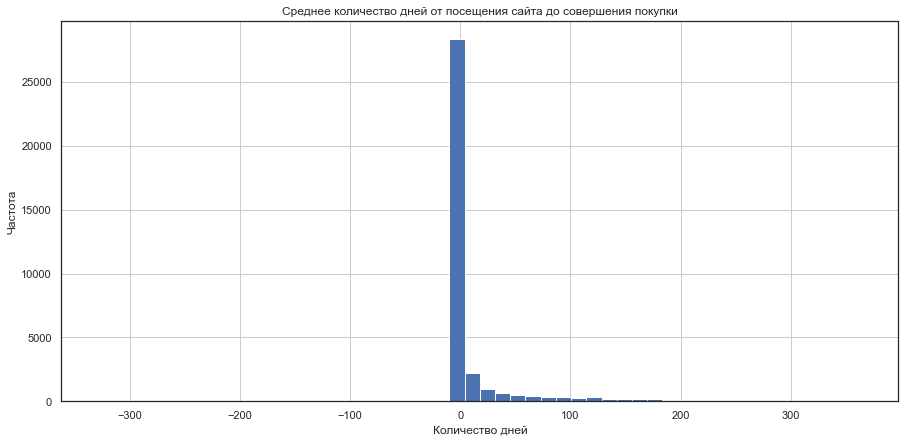

In [35]:
ax_visits = orders_visits['visits_to_purchase_time'].hist(bins=50, figsize=(15,7))
ax_visits.set_title('Среднее количество дней от посещения сайта до совершения покупки')
ax_visits.set_xlabel('Количество дней')
ax_visits.set_ylabel('Частота')
plt.show()

In [36]:
print('Медианное значение дней от момента посещения сайта до совершения покупки составляет: {:.2F}'.format(orders_visits['visits_to_purchase_time'].median()))

Медианное значение дней от момента посещения сайта до совершения покупки составляет: 0.01


На графике количества дней от момента посещения до совершения покупки наблюдается, что в основном пользователи (более 30000 человек) совершают покупку с период до 50 дней. Но также есть пользователи, у которых количество дней свыше 100 дней. Это можно объяснить тем, что пользователи сравнивают предложения в разных приложениях/платформах или просто смотрят предложения о проведении досуга, как интерес. 

# 2.2.2. Применяя когортный анализ или другой метод, рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. 

In [37]:
# найдём месяц первой покупки
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
first_orders = orders.groupby('uid').agg({'order_month' : 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
orders_first = orders.merge(first_orders, on='uid')
order_count_sum = orders_first.groupby(['uid', 'order_month', 'first_order_month']).agg({'revenue' : ['count', 'sum']}).reset_index()
order_count_sum.columns = ['uid', 'order_month', 'first_order_month', 'orders_count', 'revenue']
order_count_sum['cohort_lifetime'] = order_count_sum['order_month'] - order_count_sum['first_order_month']
order_count_sum['cohort_lifetime'] = order_count_sum['cohort_lifetime'] / np.timedelta64(1, 'M')
order_count_sum['cohort_lifetime'] = round(order_count_sum['cohort_lifetime']).astype('int')
order_count_sum

,uid,order_month,first_order_month,orders_count,revenue,cohort_lifetime
0,313578113262317,2018-01-01,2018-01-01,1,0.55,0
1,1575281904278712,2017-06-01,2017-06-01,2,3.05,0
2,2429014661409475,2017-10-01,2017-10-01,1,73.33,0
3,2464366381792757,2018-01-01,2018-01-01,1,2.44,0
4,2551852515556206,2017-11-01,2017-11-01,2,10.99,0
...,...,...,...,...,...,...
41014,18445147675727495770,2017-11-01,2017-11-01,1,3.05,0
41015,18445407535914413204,2017-09-01,2017-09-01,3,0.88,0
41016,18445601152732270159,2018-03-01,2018-03-01,1,4.22,0
41017,18446156210226471712,2018-02-01,2018-02-01,1,9.78,0


In [38]:
# # рассчитаем количество активных пользователей для каждой когорты
cohorts_orders = order_count_sum.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohorts_orders.columns = ['first_order_month', 'uid_count']
order_cohorts = order_count_sum.merge(cohorts_orders, on='first_order_month')
order_cohorts

,uid,order_month,first_order_month,orders_count,revenue,cohort_lifetime,uid_count
0,313578113262317,2018-01-01,2018-01-01,1,0.55,0,3373
1,2464366381792757,2018-01-01,2018-01-01,1,2.44,0,3373
2,4808417689019433,2018-01-01,2018-01-01,1,1.22,0,3373
3,12436904862559956,2018-01-01,2018-01-01,1,0.24,0,3373
4,21801295586117262,2018-01-01,2018-01-01,2,1.22,0,3373
...,...,...,...,...,...,...,...
41014,18376058541393893369,2017-09-01,2017-07-01,1,1.59,2,1923
41015,18376058541393893369,2017-12-01,2017-07-01,1,1.83,5,1923
41016,18386069411854663804,2017-07-01,2017-07-01,1,15.03,0,1923
41017,18404053948371855220,2017-07-01,2017-07-01,1,2.75,0,1923


In [39]:
cohorts_orders

,first_order_month,uid_count
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [40]:
orders_cohorts_pivot = order_cohorts.pivot_table(index='first_order_month', columns='cohort_lifetime', values='orders_count', aggfunc='sum')
orders_cohorts_pivot/cohorts_orders['uid_count']

,0,1,2,3,4,5,6,7,8,9,10,11,12
first_order_month,,,,,,,,,,,,,
2017-06-01,1.163618,0.092044,0.127007,0.087563,0.067281,0.053418,0.062971,0.051586,0.058066,0.043306,0.042179,0.028782,NaN
2017-07-01,1.080573,0.052002,0.087591,0.040294,0.016590,0.020093,0.013917,0.014824,0.015886,0.006793,0.023286,NaN,NaN
2017-08-01,0.757785,0.056162,0.072993,0.031383,0.019585,0.015192,0.011180,0.023125,0.012599,0.013020,NaN,NaN,NaN
2017-09-01,1.449827,0.113885,0.117518,0.063541,0.015438,0.026709,0.024641,0.016602,0.016708,NaN,NaN,NaN,NaN
2017-10-01,2.453782,0.163287,0.118248,0.047269,0.029724,0.025239,0.019621,0.037059,NaN,NaN,NaN,NaN,NaN
2017-11-01,2.379140,0.206448,0.132847,0.081751,0.031336,0.014457,0.023272,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01,2.497281,0.140406,0.147445,0.069353,0.019816,0.025729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.869995,0.116485,0.116058,0.024797,0.017972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,2.024221,0.115445,0.060584,0.027121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
orders_cohorts_pivot = order_cohorts.pivot_table(index='first_order_month', columns='cohort_lifetime', values='orders_count', aggfunc='mean')
orders_cohorts_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.163618,2.901639,3.480000,4.185185,3.318182,3.253731,4.451613,3.702128,3.655172,3.400000,2.133333,1.622642
2017-07-01,1.136765,1.923077,2.105263,1.625000,1.469388,2.157895,1.694444,1.282051,1.380952,1.090909,2.038462,NaN
2017-08-01,1.118978,1.862069,1.886792,1.840909,2.125000,1.937500,1.633333,1.772727,2.421053,1.483871,NaN,NaN
2017-09-01,1.136381,1.684615,1.610000,2.216216,1.288462,1.703125,1.636364,1.513514,1.418605,NaN,NaN,NaN
2017-10-01,1.143779,1.524272,1.317073,1.326087,1.387097,1.430556,1.535714,1.865672,NaN,NaN,NaN,NaN
2017-11-01,1.179368,1.788288,1.516667,1.990566,1.679012,1.229167,1.645161,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.152635,1.849315,1.961165,1.845361,1.720000,1.666667,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.121554,1.964912,1.915663,1.488372,1.733333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.121611,1.881356,1.431034,1.794872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
print('Среднее количество покупок на одного покупателя за 6 месяцев: {:.2f}'.format(orders_cohorts_pivot[5].mean()))

Среднее количество покупок на одного покупателя за 6 месяцев: 1.91


В расчете за 6 месяцев получилось, что пользователи совершают чуть меньше 2 покупок. На мой взгляд это довольно большой показатель.

# 2.2.3. Рассчитайте средний чек, применяя группировку по времени совершения покупки.

In [43]:
first_order_date_by_customers = orders.groupby('uid')['buy_ts'].min().reset_index()
first_order_date_by_customers.columns = ['uid', 'first_order_date']
orders = orders.merge(first_order_date_by_customers, on='uid')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

orders.head(10)

,buy_ts,revenue,uid,buy_ts_month,order_month,first_order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01,2017-06-01,2017-06-01 08:43:00,2017-06-01
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01,2017-06-01,2017-06-01 08:54:00,2017-06-01
7,2017-06-05 14:30:00,7.33,12464626743129688638,2017-06-01,2017-06-01,2017-06-01 08:54:00,2017-06-01
8,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,2017-06-01,2017-06-01 09:22:00,2017-06-01
9,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-01,2017-06-01,2017-06-01 09:22:00,2017-06-01


<AxesSubplot:xlabel='order_month'>

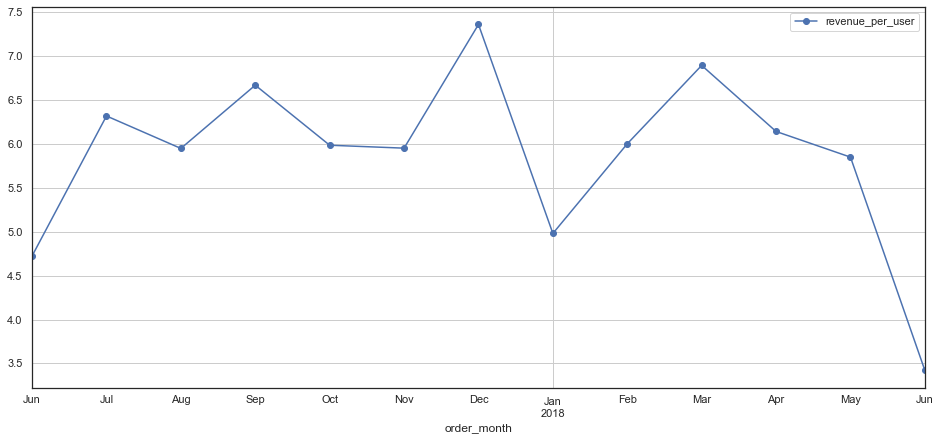

In [44]:
orders_grouped_by_cohorts = orders.groupby(
    ['order_month']
).agg({'revenue': 'sum', 'uid': 'nunique'})
orders_grouped_by_cohorts['revenue_per_user'] = (
    orders_grouped_by_cohorts['revenue']
    / orders_grouped_by_cohorts['uid']
)
revenue_per_user = orders_grouped_by_cohorts.groupby('order_month')['revenue_per_user']
revenue_per_user.head()
orders_grouped_by_cohorts.plot(y='revenue_per_user', 
               style='o-', 
               figsize=(16,7), 
               grid=True)
plt.show()

На графике можем наблюдать, что в декабре совершается больше всего покупок с самым высоким средним чеком, что логично объясняется окончанием года, и, соответственно, новогодними елками для детей, концертами групп и выступлениями артистов. В то время как в январе билетов на мероприятия становится логично меньше. 

# 2.2.4. Выясните, как меняется LTV на покупателя по когортам. Помните, что LTV — накопительная метрика.

In [45]:
# Выделим месяцы из дат в таблицах с заказами и расходами:
costs['month'] = costs['date'].astype('datetime64[M]')
costs.head()

,source_id,date,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [46]:
# Посчитаем количество новых покупателей (n_buyers) за каждый месяц:
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [47]:
# Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:
orders_new = orders.merge(first_orders, on='uid')
del orders_new['first_order_month_y']
orders_new = orders_new.rename(columns={'first_order_month_x':'first_order_month'})
orders_new.head() 

,buy_ts,revenue,uid,buy_ts_month,order_month,first_order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01


In [48]:
# Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. Сбросим индекс методом reset_index():
cohorts = (
    orders_new.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [49]:
# С точки зрения когортного анализа LTV — накопительная выручка когорты в пересчёте на количество людей. Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:
report = cohort_sizes.merge(cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [50]:
# Нужно найти валовую прибыль, умножив выручку на маржинальность.  относительный показатель. Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (age) когорты.
margin_rate = 1

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head(15) 

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4
5,2017-06-01,2023,2017-11-01,1487.92,1487.92,5
6,2017-06-01,2023,2017-12-01,1922.74,1922.74,6
7,2017-06-01,2023,2018-01-01,1176.56,1176.56,7
8,2017-06-01,2023,2018-02-01,1119.15,1119.15,8
9,2017-06-01,2023,2018-03-01,1225.51,1225.51,9


In [51]:
# Наконец, найдём LTV. Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Для наглядности визуализируем когорты в виде сводной таблицы:
report['ltv'] = report['gp'] / report['n_buyers']
report

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531
...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,13925.76,0,4.660562


In [52]:
output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)

output.fillna('') 
output = output.cumsum(axis = 1)

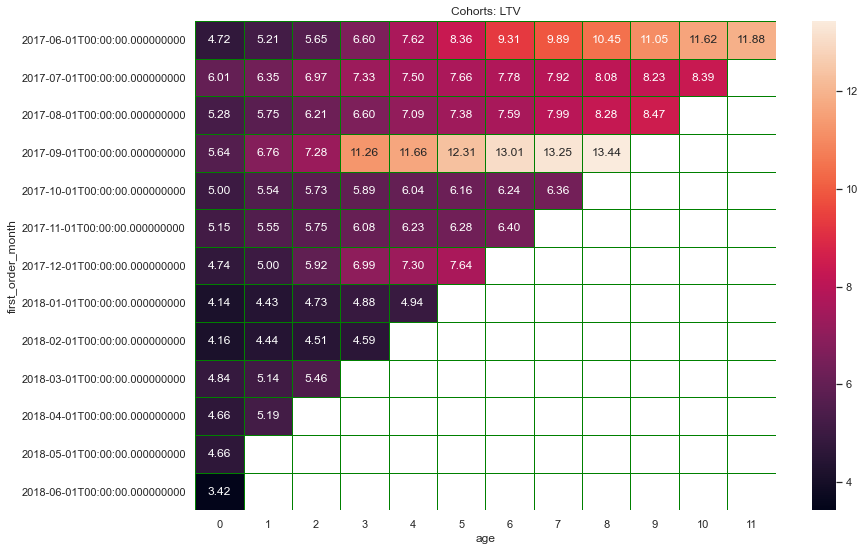

In [53]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: LTV')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='green');

In [54]:
# print('Средний LTV по когортам: {:.2f}'.format(output['ltv'].mean()))
print('Средний LTV по когортам за 6 месяцев: {:.2f}'.format(output[6].mean()))

Средний LTV по когортам за 6 месяцев: 8.39


Наибольшую итоговую сумму денег, которую один клиент приносит в среднем со всех своих покупок приносит когорта сентября 2017 года, достигая пикового показателя в 13,4 у.е., наименьшую сумму принесли когорты от января и февраля 2018 года. Вывод о наименьшой сумме из предыдущего графика соотвествует и этому графику: в январе люди реже заходят на платформу Яндекс.Афиши для покупки билетов на мероприятия.

# 2.3.1. Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам.

In [55]:
print('Общая сумма расходов на маркетинг: {:.2f}'.format(costs['costs'].sum()))

Общая сумма расходов на маркетинг: 329131.62


In [56]:
costs_source = costs.groupby(['source_id', 'month'])['costs'].sum().reset_index()
costs_source.columns = ['source_id', 'costs_month', 'costs']
costs_source

,source_id,costs_month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


In [57]:
fig = px.area(costs_source, x="costs_month", y="costs", color="source_id")
fig.show()

Наибольшие затраты носит 3 источник трафика, также заметные траты на маркетинг несут 2 и 5 источник трафика. Пиковых значений расходы достигает в ноябре-декабре 2017 года, как раз когда и растет график с покупками. Наименьшие зщначения график достигает в августе 2017 года. 

# 2.3.2. Рассчитайте средний CAC на одного покупателя для всего проекта и для каждого источника трафика. 

In [58]:
# Отсортируем таблицу с посетителями по столбцу 'session_start_ts'
visits = visits.sort_values(by='session_start_ts', ascending=True)
visits

,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_date,time_spent
308527,desktop,2017-06-01 00:02:00,5,2017-06-01 00:01:00,13890188992670018146,2017,6,22,2017-06-01,1.0
245715,desktop,2017-06-01 00:16:00,3,2017-06-01 00:02:00,16706502037388497502,2017,6,22,2017-06-01,14.0
11727,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,10329302124590727494,2017,6,22,2017-06-01,2.0
69744,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,11627257723692907447,2017,6,22,2017-06-01,11.0
278203,desktop,2017-06-01 00:39:00,4,2017-06-01 00:14:00,17384547788533003069,2017,6,22,2017-06-01,25.0
...,...,...,...,...,...,...,...,...,...,...
209511,desktop,2018-05-31 23:59:00,5,2018-05-31 23:58:00,8899817935489303404,2018,5,22,2018-05-31,1.0
198329,desktop,2018-06-01 00:11:00,3,2018-05-31 23:59:00,3720373600909378583,2018,5,22,2018-05-31,12.0
263781,desktop,2018-06-01 00:25:00,1,2018-05-31 23:59:00,4906562732540547408,2018,5,22,2018-05-31,26.0
299620,desktop,2018-06-01 00:04:00,4,2018-05-31 23:59:00,83872787173869366,2018,5,22,2018-05-31,5.0


In [59]:
# сгруппируем таблицу visits по пользователю и выведем информацию о источнику трафика
visits_grouped = visits.groupby('uid')['source_id'].first().reset_index()
visits_grouped.columns = ['uid', 'first_source_id']

In [60]:
visits_grouped

,uid,first_source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5
...,...,...
207046,18446316582013423015,3
207047,18446403737806311543,5
207048,18446556406699109058,3
207049,18446621818809592527,4


In [61]:
costs

,source_id,date,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [62]:
# Сгруппируем таблицу costs по месяцу и источнику трафика и выведем сумму затрат
costs_grouped = costs.groupby(['month', 'source_id']).agg({'costs': 'sum'}).reset_index()
costs_grouped.columns = ['month', 'source_id', 'costs']
costs_grouped

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


In [63]:
orders

,buy_ts,revenue,uid,buy_ts_month,order_month,first_order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,2018-05-31 23:50:00,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,2018-05-31 23:50:00,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,2018-05-31 23:54:00,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,2018-05-31 23:56:00,2018-05-01


In [64]:
# присоединим к начальной таблице orders таблицу visits_grouped по столбцу 'uid'
orders = orders.merge(visits_grouped, on='uid')
orders

,buy_ts,revenue,uid,buy_ts_month,order_month,first_order_date,first_order_month,first_source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01,3
...,...,...,...,...,...,...,...,...
49936,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,2018-05-31 23:50:00,2018-05-01,4
49937,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,2018-05-31 23:50:00,2018-05-01,10
49938,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,2018-05-31 23:54:00,2018-05-01,3
49939,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,2018-05-31 23:56:00,2018-05-01,3


In [65]:
# сгруппируем таблицу orders по столбцам 'first_order_month', 'first_source_id' и выведем количество покупателей
orders_grouped = orders.groupby(['first_order_month', 'first_source_id']).agg({'uid': 'count'}).reset_index()
orders_grouped.columns = ['first_order_month', 'first_source_id', 'n_buyers']
orders_grouped

,first_order_month,first_source_id,n_buyers
0,2017-06-01,1,920
1,2017-06-01,2,630
2,2017-06-01,3,868
3,2017-06-01,4,632
4,2017-06-01,5,1104
...,...,...,...
81,2018-05-01,4,849
82,2018-05-01,5,529
83,2018-05-01,9,62
84,2018-05-01,10,140


In [66]:
# сгруппируем таблицу orders по столбцам 'first_order_month', 'buy_ts_month', 'first_source_id' и выведем сумму заказов
orders_grouped_revenue = orders.groupby(['first_order_month', 'buy_ts_month', 'first_source_id']).agg({'revenue': 'sum'}).reset_index()
orders_grouped_revenue.columns = ['first_order_month', 'order_month', 'first_source_id', 'revenue_sum']
orders_grouped_revenue

,first_order_month,order_month,first_source_id,revenue_sum
0,2017-06-01,2017-06-01,1,1326.73
1,2017-06-01,2017-06-01,2,1010.58
2,2017-06-01,2017-06-01,3,2760.27
3,2017-06-01,2017-06-01,4,1949.19
4,2017-06-01,2017-06-01,5,1928.60
...,...,...,...,...
512,2018-05-01,2018-05-01,4,3368.32
513,2018-05-01,2018-05-01,5,2067.00
514,2018-05-01,2018-05-01,9,217.49
515,2018-05-01,2018-05-01,10,456.23


In [67]:
# присоединим таблицу orders_grouped к таблице orders_grouped_revenue
grouped_table = orders_grouped.merge(orders_grouped_revenue, on=['first_order_month', 'first_source_id'])

In [68]:
# рассчитаем показатели gp, age и ltv в разрезе по источникам и когортам
margin_rate = 1
grouped_table['gp'] = grouped_table['revenue_sum'] * margin_rate
grouped_table['age'] = (
    grouped_table['order_month'] - grouped_table['first_order_month']
) / np.timedelta64(1, 'M')
grouped_table['age'] = grouped_table['age'].round().astype('int') 
grouped_table['ltv'] = grouped_table['gp'] / grouped_table['n_buyers']
grouped_table.head()

,first_order_month,first_source_id,n_buyers,order_month,revenue_sum,gp,age,ltv
0,2017-06-01,1,920,2017-06-01,1326.73,1326.73,0,1.442098
1,2017-06-01,1,920,2017-07-01,421.09,421.09,1,0.457707
2,2017-06-01,1,920,2017-08-01,393.23,393.23,2,0.427424
3,2017-06-01,1,920,2017-09-01,422.88,422.88,3,0.459652
4,2017-06-01,1,920,2017-10-01,682.96,682.96,4,0.742348


In [69]:
# рассчитаем показатели cac и romi в разрезе когорт и источников
output_table = grouped_table.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round()

output_table.fillna('')
grouped_table = grouped_table.merge(costs_grouped, left_on=['first_source_id', 'order_month'], right_on=['source_id', 'month'])
grouped_table['cac'] = grouped_table['costs'] / grouped_table['n_buyers']
grouped_table['romi'] = grouped_table['ltv'] / grouped_table['cac']
grouped_table

,first_order_month,first_source_id,n_buyers,order_month,revenue_sum,gp,age,ltv,month,source_id,costs,cac,romi
0,2017-06-01,1,920,2017-06-01,1326.73,1326.73,0,1.442098,2017-06-01,1,1125.61,1.223489,1.178676
1,2017-06-01,1,920,2017-07-01,421.09,421.09,1,0.457707,2017-07-01,1,1072.88,1.166174,0.392486
2,2017-07-01,1,421,2017-07-01,1207.98,1207.98,0,2.869311,2017-07-01,1,1072.88,2.548409,1.125923
3,2017-06-01,1,920,2017-08-01,393.23,393.23,2,0.427424,2017-08-01,1,951.81,1.034576,0.413139
4,2017-07-01,1,421,2017-08-01,175.31,175.31,1,0.416413,2017-08-01,1,951.81,2.260831,0.184186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,2017-10-01,10,239,2018-04-01,4.16,4.16,6,0.017406,2018-04-01,10,388.25,1.624477,0.010715
511,2017-11-01,10,171,2018-04-01,6.36,6.36,5,0.037193,2018-04-01,10,388.25,2.270468,0.016381
512,2018-02-01,10,137,2018-04-01,0.49,0.49,2,0.003577,2018-04-01,10,388.25,2.833942,0.001262
513,2018-03-01,10,224,2018-04-01,7.21,7.21,1,0.032188,2018-04-01,10,388.25,1.733259,0.018571


In [70]:
output_grouped_data = grouped_table.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

output_grouped_data.fillna('') 
output_grouped_data

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.687446,0.084713,0.123544,0.125264,0.092253,0.060521,0.075187,0.057667,0.051315,0.054747,0.069276,0.055257
2017-07-01,0.737316,0.125629,0.132135,0.033741,0.019277,0.014746,0.014531,0.012847,0.020789,0.025701,0.026113,NaN
2017-08-01,0.669392,0.037113,0.029536,0.021939,0.024018,0.016186,0.014524,0.035595,0.039287,0.018987,NaN,NaN
2017-09-01,0.683779,0.111748,0.049768,0.273712,0.039968,0.057281,0.079653,0.051299,0.057444,NaN,NaN,NaN
2017-10-01,0.769396,0.078647,0.032432,0.027630,0.027967,0.034176,0.020117,0.029289,NaN,NaN,NaN,NaN
2017-11-01,0.708933,0.046247,0.036687,0.060332,0.026471,0.013873,0.021575,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.611547,0.047355,0.154035,0.204033,0.072118,0.082249,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.464590,0.030718,0.039110,0.040121,0.011351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.564578,0.045069,0.013152,0.012196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


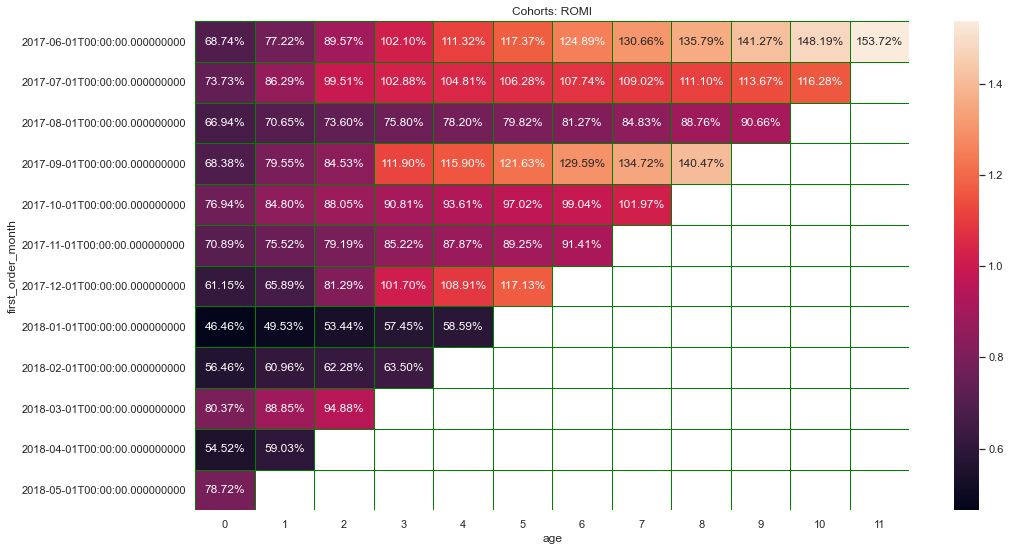

In [71]:
output_grouped_data = output_grouped_data.cumsum(axis = 1)
sns.set(style='white')
plt.figure(figsize=(16, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output_grouped_data, annot=True, fmt='.2%', linewidths=1, linecolor='green');

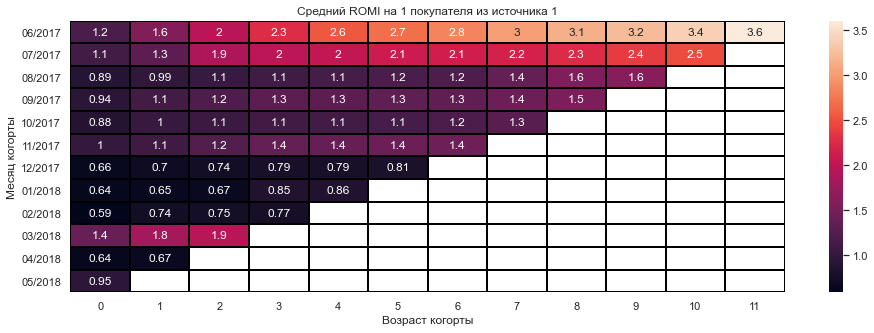

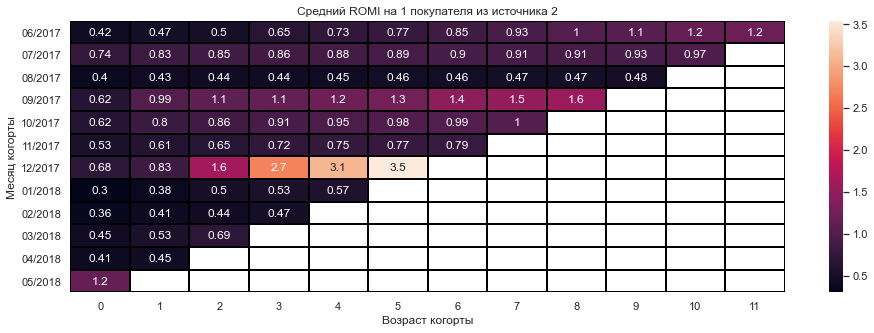

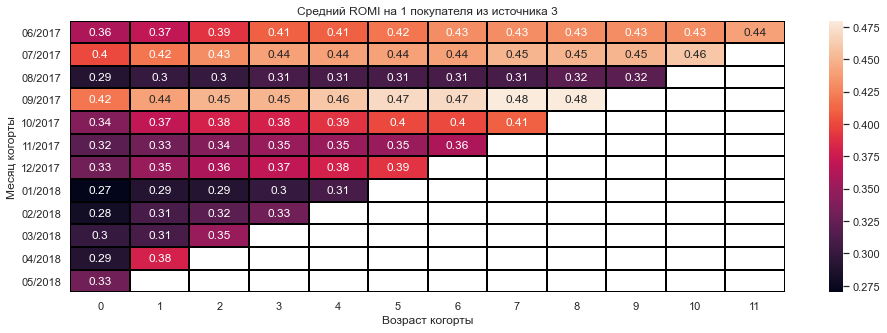

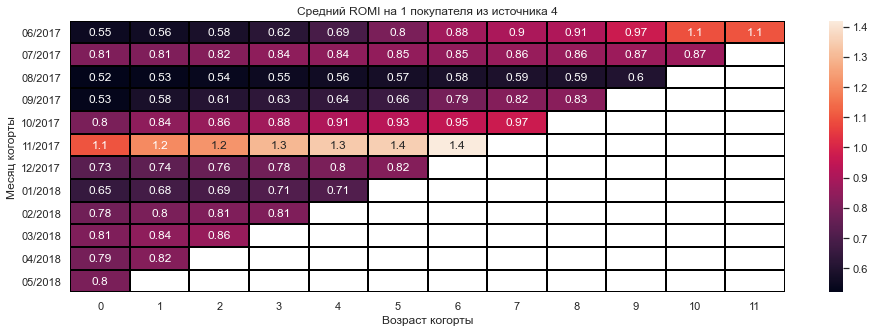

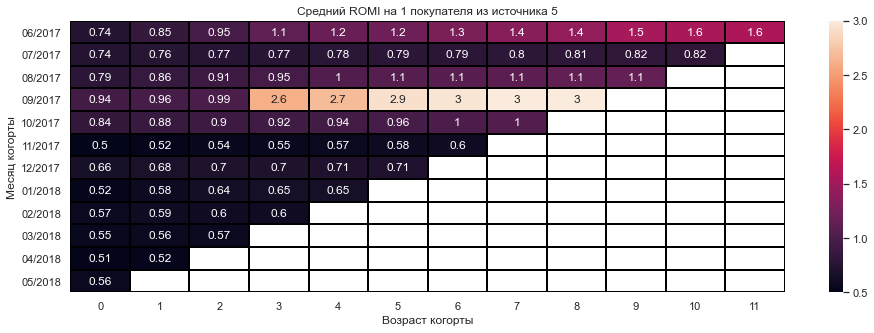

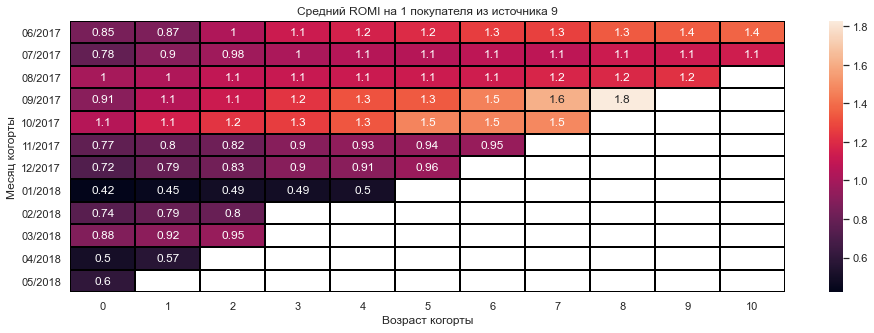

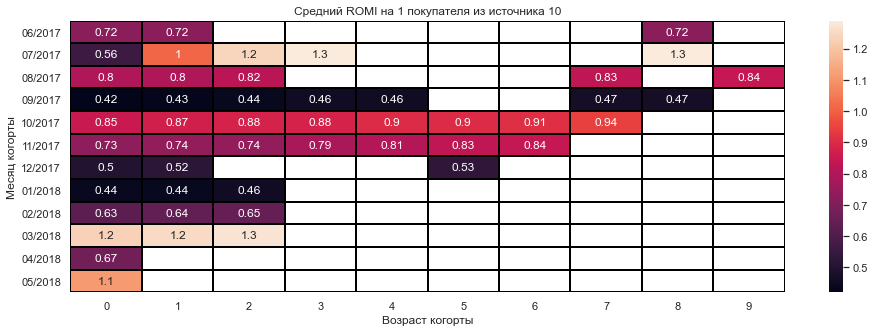

In [72]:
sources = grouped_table['source_id'].unique()
for source in sources:
    plt.figure(figsize=(16, 5))
 
    romi_by_sources = (grouped_table[grouped_table['source_id'] == source]
              .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean'))
    romi_by_sources.index = romi_by_sources.index.strftime("%m/%Y")
 
    sns.heatmap(romi_by_sources.cumsum(axis=1).round(2), annot=True, linewidths=0.2, linecolor='black')
 
    plt.title('Средний ROMI на 1 покупателя из источника {}'.format(source))
    plt.xlabel('Возраст когорты')
    plt.ylabel('Месяц когорты')


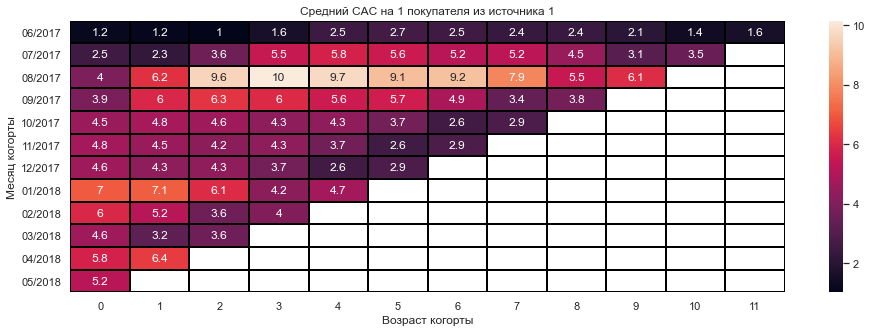

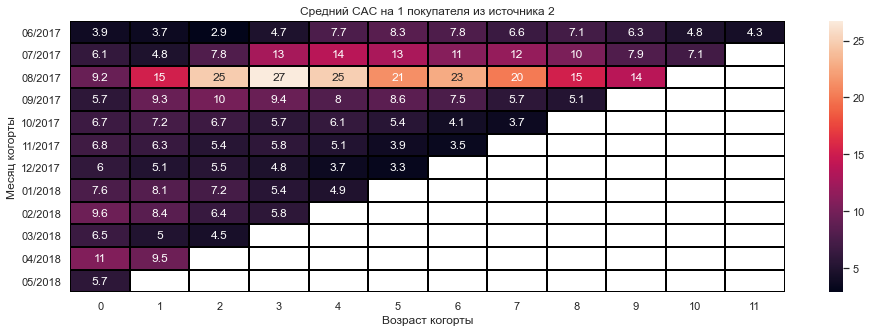

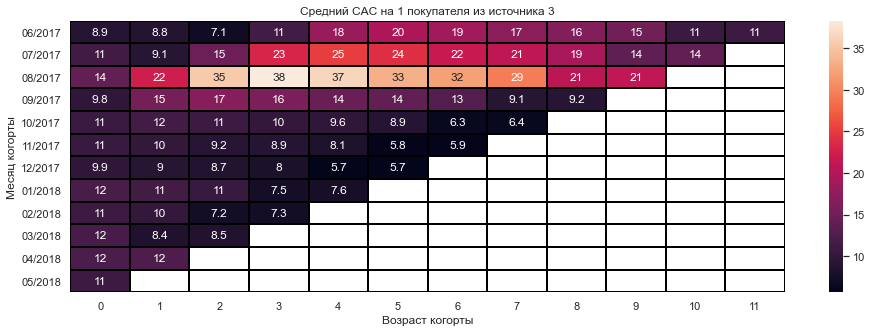

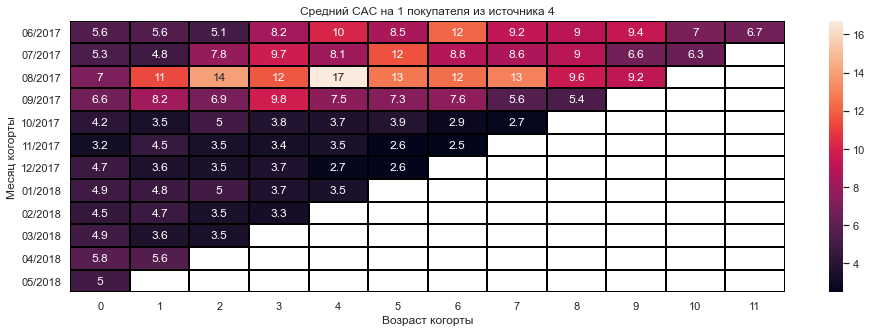

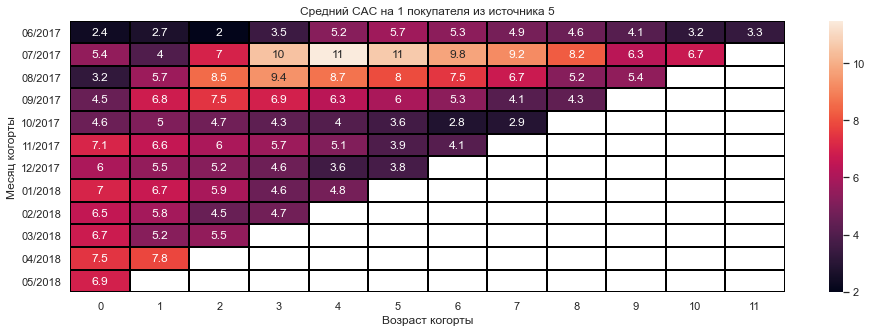

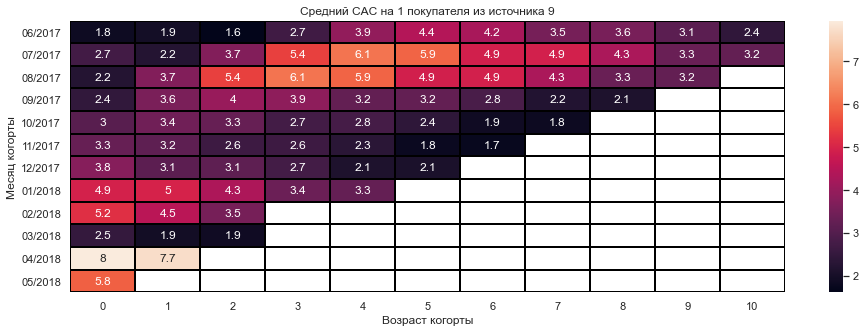

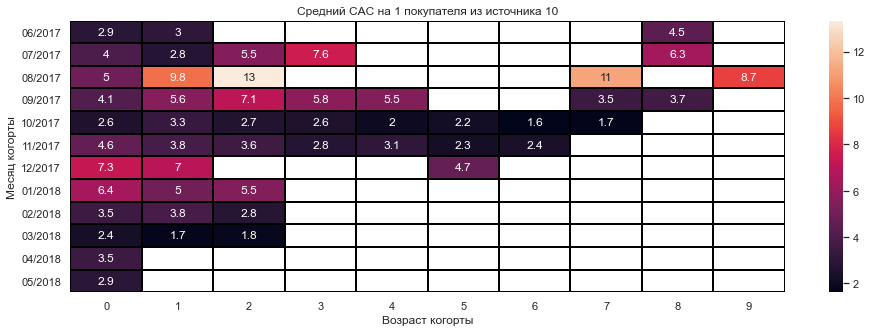

In [73]:
for source in sources:
    plt.figure(figsize=(16, 5))
 
    cac_by_sources = (grouped_table[grouped_table['source_id'] == source]
              .pivot_table(index='first_order_month', columns='age', values='cac', aggfunc='mean'))
    cac_by_sources.index = cac_by_sources.index.strftime("%m/%Y")
 
    sns.heatmap(cac_by_sources.round(2), annot=True, linewidths=0.2, linecolor='black')
 
    plt.title('Средний CAC на 1 покупателя из источника {}'.format(source))
    plt.xlabel('Возраст когорты')
    plt.ylabel('Месяц когорты')

In [74]:
grouped_data = grouped_table.groupby(['source_id', 'first_order_month'])['ltv', 'cac', 'romi'].agg({'ltv':'mean', 'cac':'mean', 'romi':'mean'}).reset_index()
grouped_data.columns = ['source_id', 'first_order_month', 'ltv_mean', 'cac_mean', 'romi_mean']
grouped_data

C:\Users\chern\AppData\Local\Temp\ipykernel_14180\1472108728.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,source_id,first_order_month,ltv_mean,cac_mean,romi_mean
0,1,2017-06-01,0.478310,1.887072,0.300475
1,1,2017-07-01,0.730916,4.255595,0.225116
2,1,2017-08-01,0.892813,7.732274,0.162026
3,1,2017-09-01,0.748435,5.050834,0.170532
4,1,2017-10-01,0.698988,3.973713,0.159514
...,...,...,...,...,...
79,10,2018-01-01,0.966597,5.630694,0.151836
80,10,2018-02-01,0.755766,3.395474,0.215004
81,10,2018-03-01,0.985015,1.971012,0.421905
82,10,2018-04-01,2.378091,3.529545,0.673767


In [75]:
grouped_data_1 = grouped_table.groupby('source_id')['ltv', 'cac', 'romi'].agg({'ltv':'mean', 'cac':'mean', 'romi':'mean'}).reset_index()
grouped_data_1.columns = ['source_id', 'ltv_mean', 'cac_mean', 'romi_mean']
grouped_data_1

C:\Users\chern\AppData\Local\Temp\ipykernel_14180\4174258567.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,source_id,ltv_mean,cac_mean,romi_mean
0,1,0.927297,4.490195,0.230343
1,2,1.048019,8.374092,0.165111
2,3,0.647779,13.970382,0.058345
3,4,0.709985,6.480791,0.136099
4,5,0.843411,5.711579,0.151033
5,9,0.557548,3.543232,0.162830
6,10,0.764381,4.481180,0.199824


In [76]:
fig = px.area(grouped_data, x='first_order_month', y="romi_mean", color="source_id")
fig.show()

# 3.1. Определите источники трафика, на которые маркетологам стоит делать упор.

По результатам исследования, на мой взгляд, маркетологам стоит обратить внимание на метрику ROMI, так как она показывает окупаемость затрат. На графике ROMI в разрезе источников наблюдается наибольшее значение у источника 1. Наибольшие значения показывает первая когорта, она окупилась уже в первый месяц. В целом она окупилась к концу периода в 3,6 раз. Во 2, 3, 4, 5 и 10 источнике по большинству когорт затраты на не окупились, что свидетельствует о неэффективных вложениях в маркетинг, а также о низких доходах от деятельности. Маркетологам стоит обратить внимаение на 1 и 9 источник, так как когорты по данному источнику окупаются в большей своей части. 
Как видно из графиков САС по разным источникам трафика наибольшие показатели имеет когорта 08/2017. 
Для 2,3 и 4 источника трафика показатели CAC сильно завышены, для них можно сделать исключение и уменьшить расходы по ним, а нераспределенный бюджет инвестировать в 1 и 9 источник трафика. В таком случае компания может привлечь новых пользователей, и ,соответсвенно, увеличить потенциальные доходы. 

# 3.2. Опишите выводы, которые вы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции.

По результатам исследования можно сделать вывод, что затраты, так же как и доходы растут, начиная с августа, заканчивая пиковым значением в декабре. Возомжно, здесь играет в большей степени необъяснимые выделяющиеся значения в конце декабря, их объяснить можно только тем, что в декабре появляется большой спрос на мероприятия, новогодние елки, предновогодние концерты и др. Это логичное объяснение, но его нельзя проверить без дополнительной информации. 

# 3.3. Подведите итоги когортного анализа. 

Для анализа самой перспективной группы клиентов возьмем показатель ROMI. Самыми перспективными являются когорты по июню, сентябрю и декабрь, так как они окупаются за 4 месяца. Дело в том, что компания начала наращивать обороты начиная с конца октября, как мы это можем наблюдать по увеличению затрат на маркетинг и доходов от продаж. Расходы выросли, количество новых клиентов тоже, но на окупаемость требуется 4 месяца, вот доходы и не успели «догнать» затраты.